In [1]:
#importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
%matplotlib inline

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
#!pip install termcolor
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint

# Figure&Display options
plt.rcParams["figure.figsize"] = (16, 9)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
#!pip install cufflinks

In [7]:
# Importing plotly and cufflinks in offline mode
# import cufflinks as cf
# import plotly.offline
# cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [8]:
fmcg_data = pd.read_csv("Data.csv")
fmcg_data.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


In [9]:
#!pip install ipywidgets

In [10]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

In [11]:
def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n', 
          colored('*'*100, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Descriptive Statistics \n", attrs=['bold']), df.describe().round(2),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='') # Gives a statstical breakdown of the data.
    print(colored("Descriptive Statistics (Categorical Columns) \n", attrs=['bold']), df.describe(include=object).T,'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='') # Gives a statstical breakdown of the data.

In [12]:
# To view summary information about the columns

def first_look(df,col):
    print("column name    : ", col)
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("Value counts   : \n", df[col].value_counts(dropna = False)) 
    print(colored("-"*100, 'red',attrs=['bold']), sep="")

In [13]:
def multicolinearity_control(df):
    feature =[]
    collinear=[]
    for col in df.corr().columns:
        for i in df.corr().index:
            if (abs(df.corr()[col][i])> .75 and abs(df.corr()[col][i]) < 1):
                    feature.append(col)
                    collinear.append(i)
                    print(colored(f"Multicolinearity alert in between:{col} - {i}", 
                                  "red", attrs=['bold']), df.shape,'\n',
                                  colored('*'*100, 'red', attrs=['bold']), sep='')
    else:
        print("No Multicolinearity")

In [14]:
def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored(" Duplicates were dropped!"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')

In [15]:
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary, the realted columns will be dropped!', attrs=['bold']),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')

In [16]:
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)       
    print(colored("New shape after missing value control:"),'\n', df.shape)

In [17]:
missing_values(fmcg_data)

,Missing_Number,Missing_Percent
wh_est_year,11881,0.47524
workers_num,990,0.03960
approved_wh_govt_certificate,908,0.03632


In [18]:
first_looking(fmcg_data)

Shape:(25000, 24)
****************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object

In [19]:
duplicate_values(fmcg_data)

Duplicate check...
There are no duplicates
****************************************************************************************************


### Checking for null values and dropping the columns with more than 30% null

<Figure size 500x500 with 0 Axes>

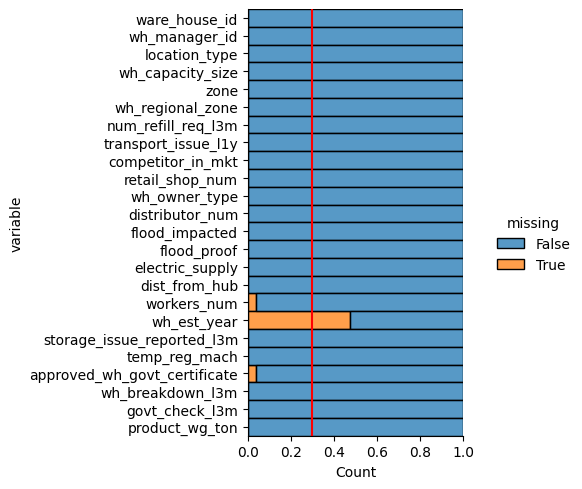

In [20]:
plt.figure(figsize = (5, 5))

sns.displot(
    data = fmcg_data.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 5)

plt.axvline(0.3, color = "r");

In [21]:
drop_null(fmcg_data,30)

Shape: (25000, 24)
11881 percent of wh_est_year null and were dropped
new shape: (25000, 23)
New shape after missing value control: 
 (25000, 23)


In [22]:
multicolinearity_control(fmcg_data)

ValueError: could not convert string to float: 'WH_100000'

# Building a Pipeline and saving the model

In [23]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

In [24]:
drop_cols = ["ware_house_id", "wh_manager_id"]
df=fmcg_data.drop(columns=drop_cols)

In [25]:
X = df.drop(columns="product_wg_ton", axis=1)
y = df["product_wg_ton"]

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [27]:
x_train=X_train.copy()

In [28]:

# The ColumnsSelector class inherits from the sklearn.base classes 
# (BaseEstimator, TransformerMixin). This makes it compatible with 
# scikit-learn’s Pipelines
class MappingColumns(BaseEstimator, TransformerMixin):
    # initializer 
    def __init__(self,):
        pass
        
    def fit(self, X, y = None):
        return self
    
    def locationType(self,x):
        if x=="Urban":
            return 0
        if x=="Rural":
            return 1

    def whCapacity(self,x):
        if x == "Small":
            return 0
        if x == "Mid":
            return 1
        if x == "Large":
            return 2

    def whOwner(self,x):
        if x == "Rented":
            return 0
        if x == "Company Owned":
            return 1

    def appGovtCert(self,x):
        if x  == "C":
            return 0
        if x == "B":
            return 1
        if x == "B+":
            return 2
        if x == "A":
            return 3
        if x == "A+":
            return 4


    def transform(self, X, y = None):
        X["location_type"] = X["location_type"].apply(self.locationType)
        X["wh_capacity_size"]=X["wh_capacity_size"].apply(self.whCapacity)
        X["wh_owner_type"]=X["wh_owner_type"].apply(self.whOwner)
        X["approved_wh_govt_certificate"]=X["approved_wh_govt_certificate"].apply(self.appGovtCert)
        return X

In [26]:
mapping = Pipeline(steps=[("map_col",MappingColumns())])
col_encode=['zone', 'wh_regional_zone']
preprocessor = ColumnTransformer(transformers=[('ohe', OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore'), col_encode)], remainder='passthrough')
KNN_transformer = Pipeline(steps=[("robust_scalar" , RobustScaler(with_centering=False)),("imputer" , KNNImputer(n_neighbors=5, weights='distance'))])
pipeline = Pipeline(steps=[
    ('mapping', mapping),
    ('preprocessor', preprocessor),
    ('KNN_transformer',KNN_transformer),
    ])

In [27]:
X_final=pipeline.fit_transform(x_train)
X_test = pipeline.transform(X_test)

### Model Building and Evaluation

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [29]:
# !pip install xgboost

### Initialize Default Models in a dictionary

In [30]:
GBmodel = GradientBoostingRegressor()
GBmodel.fit(X_final, y_train) # Train model
# Make predictions
y_train_pred = GBmodel.predict(X_final)
y_test_pred = GBmodel.predict(X_test)

#train
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r_score_train = r2_score(y_train, y_train_pred)

#test
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r_score_test = r2_score(y_test, y_test_pred)
print(f"Root mean square train error: {rmse_train}\nRoot mean square test error: {rmse_test}\nTrain score: {r_score_train}\nTest score: {r_score_test}\n")

Root mean square train error: 915.8558047085133
Root mean square test error: 947.6616202123985
Train score: 0.993775264994734
Test score: 0.9933328650264206



## Hyper parameter tuning

In [31]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV

# # Create a decision tree regressor
# tree = DecisionTreeRegressor()

# # Define the hyperparameters to tune and their values
# params = {
#     'max_depth': [3, 5, 7, 9],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Use GridSearchCV to search for the best hyperparameters
# grid_search = GridSearchCV(tree, params, cv=5)
# grid_search.fit(X_final, y_train)

# # Print the best hyperparameters and the corresponding score
# print('Best hyperparameters: ', grid_search.best_params_)
# print('Best score: ', grid_search.best_score_)

In [32]:
from sklearn.tree import DecisionTreeRegressor
GBmodel = DecisionTreeRegressor(max_depth = 9, min_samples_leaf= 4, min_samples_split= 10)
GBmodel.fit(X_final, y_train) # Train model
# Make predictions
y_train_pred = GBmodel.predict(X_final)
y_test_pred = GBmodel.predict(X_test)

#train
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r_score_train = r2_score(y_train, y_train_pred)

#test
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r_score_test = r2_score(y_test, y_test_pred)
print(f"Root mean square train error: {rmse_train}\nRoot mean square test error: {rmse_test}\nTrain score: {r_score_train}\nTest score: {r_score_test}\n")

Root mean square train error: 877.9420695340094
Root mean square test error: 970.2326038906749
Train score: 0.9942799689872707
Test score: 0.9930114932001851



In [33]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# import numpy as np

# # Define the RandomForestRegressor model
# rf = RandomForestRegressor()

# # Define the grid of hyperparameters to search
# param_grid = {
# #     'n_estimators': [100, 200, 300],
# #     'max_features': ['auto', 'sqrt', 'log2'], #auto
# #     'max_depth': [10, 20, 30, None], #10
# #     'min_samples_split': [2, 5, 10], #10
# #     'min_samples_leaf': [1, 2, 4],
# #     'bootstrap': [True, False]
# }

# # Use GridSearchCV to search for the best hyperparameters
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
# grid_search.fit(X_final, y_train)

# # Print the best hyperparameters
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [34]:
rfmodel = RandomForestRegressor(max_depth = 10, max_features= 'auto', min_samples_leaf= 4, min_samples_split= 14, n_estimators= 120)
rfmodel.fit(X_final, y_train) # Train model
# Make predictions
y_train_pred = GBmodel.predict(X_final)
y_test_pred = GBmodel.predict(X_test)

#train
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r_score_train = r2_score(y_train, y_train_pred)

#test
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r_score_test = r2_score(y_test, y_test_pred)
print(f"Root mean square train error: {rmse_train}\nRoot mean square test error: {rmse_test}\nTrain score: {r_score_train}\nTest score: {r_score_test}\n")

Root mean square train error: 877.9420695340094
Root mean square test error: 970.2326038906749
Train score: 0.9942799689872707
Test score: 0.9930114932001851



In [35]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# param_dist = {'n_estimators': randint(50, 200),
#               'max_features': ['auto', 'sqrt', 'log2', None],
#               'max_depth': [None, 5, 10, 20, 30, 40, 50],
#               'min_samples_split': randint(2, 20),
#               'min_samples_leaf': randint(1, 10)}
# rf = RandomForestRegressor()
# random_search = RandomizedSearchCV(estimator=rf,
#                                    param_distributions=param_dist,
#                                    n_iter=50,
#                                    cv=5,
#                                    random_state=42)
# random_search.fit(X_final, y_train)

# print('Best hyperparameters: ', random_search.best_params_)
# print('Best score: ', random_search.best_score_)
# Best hyperparameters:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 120}
# Best score:  0.9933191005289543

In [36]:
# # Define the model
# model = GradientBoostingRegressor()

# # Define the hyperparameter grid to search
# param_grid = {'learning_rate': [0.1, 0.05, 0.01],
#               'max_depth': [3, 5, 7],
#               'n_estimators': [50, 100, 200]}

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(model, param_grid, cv=5)
# grid_search.fit(X_final, y_train)

# # Print the best hyperparameters and the corresponding score
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [37]:
GBmodel = GradientBoostingRegressor(learning_rate= 0.05, max_depth= 5, n_estimators= 200)
GBmodel.fit(X_final, y_train) # Train model
# Make predictions
y_train_pred = GBmodel.predict(X_final)
y_test_pred = GBmodel.predict(X_test)

#train
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r_score_train = r2_score(y_train, y_train_pred)

#test
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r_score_test = r2_score(y_test, y_test_pred)
print(f"Root mean square train error: {rmse_train}\nRoot mean square test error: {rmse_test}\nTrain score: {r_score_train}\nTest score: {r_score_test}\n")

Root mean square train error: 846.4172326146295
Root mean square test error: 931.5260403119332
Train score: 0.9946833795597149
Test score: 0.9935579711933958



### Saving the model

In [38]:
import dill
data = {"model": GBmodel, "pipeline":pipeline}
with open ('saved_steps.pkl', 'wb') as file:
    dill.dump(data, file)